# Logistic Regression

In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing training and testing sets
train_data = pd.read_csv("/Users/hkrukauskas/Documents/GitHub/ML-final-project/csvTrainImages 13440x1024.csv", header = None).values
train_label = pd.read_csv("/Users/hkrukauskas/Documents/GitHub/ML-final-project/csvTrainLabel 13440x1.csv", header = None)

test_data = pd.read_csv("/Users/hkrukauskas/Documents/GitHub/ML-final-project/csvTestImages 3360x1024.csv", header = None).values
test_label = pd.read_csv("/Users/hkrukauskas/Documents/GitHub/ML-final-project/csvTestLabel 3360x1.csv", header = None)

In [3]:
#Reshaping train_label and tes_label to be 2D array
train_label = np.array(train_label).reshape((train_label.shape[0], 1))
test_label = np.array(test_label).reshape((test_label.shape[0], 1))

In [4]:
#Normalization
train_data = train_data / 255.0
test_data = test_data / 255.0

In [5]:
#C values for regularization
c_lst = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

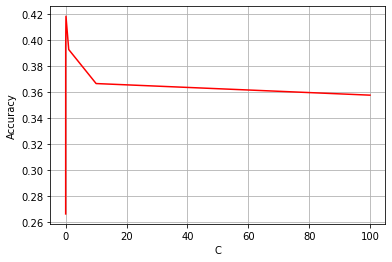

In [6]:
k1 = []
k2 = []
for elem in c_lst:
    clf = LogisticRegression(C = elem, penalty = "l2", tol = 0.1)
    clf.fit(train_data, train_label)
    score_test = clf.score(test_data, test_label)
    score_train = clf.score(train_data, train_label)
    k1.append(score_test)
    k2.append(score_train)
    
plt.plot(c_lst, k1, "r-")
plt.grid(True)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

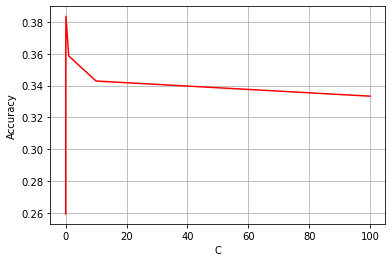

In [7]:
train_data1 = train_data ** 2
test_data1 = test_data ** 2

j1 = []
j2 = []
for elem in c_lst:
    clf = LogisticRegression(C = elem, penalty = "l2", tol = 0.1)
    clf.fit(train_data1, train_label)
    score_test = clf.score(test_data1, test_label)
    score_train = clf.score(train_data, train_label)
    j1.append(score_test)
    j2.append(score_train)
    
plt.plot(c_lst, j1, "r-")
plt.grid(True)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show() 

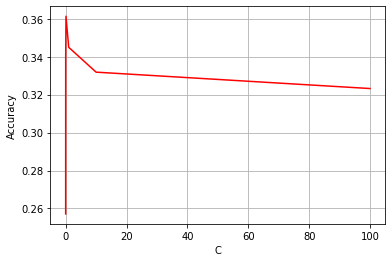

In [8]:
train_data2 = train_data ** 3
test_data2 = test_data ** 3

z1 = []
z2 = []
for elem in c_lst:
    clf = LogisticRegression(C = elem, penalty = "l2", tol = 0.1)
    clf.fit(train_data2, train_label)
    score_test = clf.score(test_data2, test_label)
    score_train = clf.score(train_data, train_label)
    z1.append(score_test)
    z2.append(score_train)
    
plt.plot(c_lst, z1, "r-")
plt.grid(True)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

Text(0.5, 1.0, 'Accuracy Score: 0.41845238095238096')

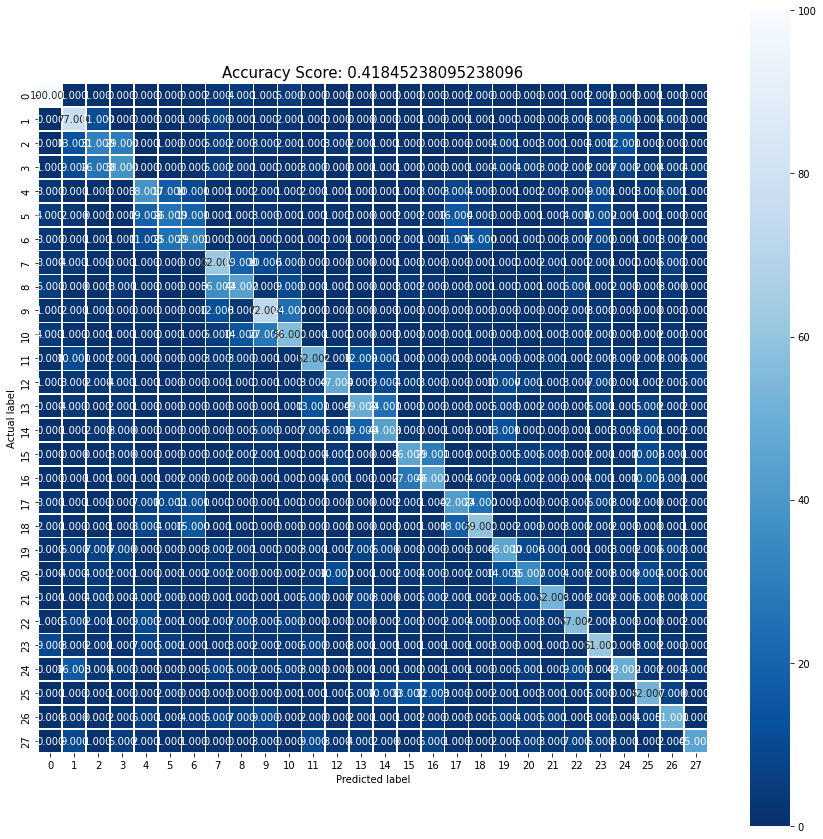

In [10]:
clf = LogisticRegression(C = 0.1, penalty = "l2", tol = 0.1)
clf.fit(train_data, train_label)
score = clf.score(test_data, test_label)

test_pred_label1 = clf.predict(test_data)
test_pred_label2 = clf.predict(train_data)

score_test = accuracy_score(y_true = test_label, y_pred = test_pred_label1)
score_train = accuracy_score(y_true = train_label, y_pred = test_pred_label2)

cm = confusion_matrix(y_true = test_label, y_pred = test_pred_label1)

plt.figure(figsize = (15, 15))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)